In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

### Load Data and Examine

In [52]:
data=pd.read_csv('ToyotaCorolla - MLR.csv')

In [53]:
data.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [54]:
data.tail()

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114

In [55]:
data.shape

(1436, 11)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


### Summary Statistics

In [57]:
data.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

### Clean and Preprocess

In [58]:
# change column names wherever necessary
data.rename(columns=
    {
        'Age_08_04':'Age',
        'cc':'CC',
        'Fuel_Type':'FuelType'
    },inplace=True
)

In [59]:
#The column 'Automatic' is a categorical field but it is percieved as a numerical one.

In [60]:
data.head()

Price  Age     KM FuelType  HP  Automatic    CC  Doors  Cylinders  Gears  \
0  13500   23  46986   Diesel  90          0  2000      3          4      5   
1  13750   23  72937   Diesel  90          0  2000      3          4      5   
2  13950   24  41711   Diesel  90          0  2000      3          4      5   
3  14950   26  48000   Diesel  90          0  2000      3          4      5   
4  13750   30  38500   Diesel  90          0  2000      3          4      5   

   Weight  
0    1165  
1    1165  
2    1165  
3    1165  
4    1170

### Visualisation

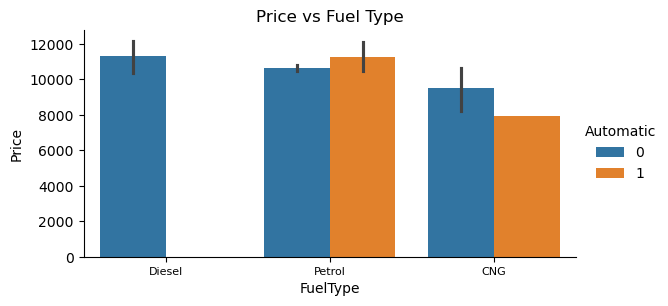

In [61]:
#RELATIONSHIP OF PRICE WRT FUEL TYPE
sns.catplot(data, x='FuelType',
            y='Price', 
            kind = 'bar',
            height=3, 
            aspect=2,
            hue='Automatic'
           )
plt.title('Price vs Fuel Type')
plt.xticks(fontsize=8)
plt.show()

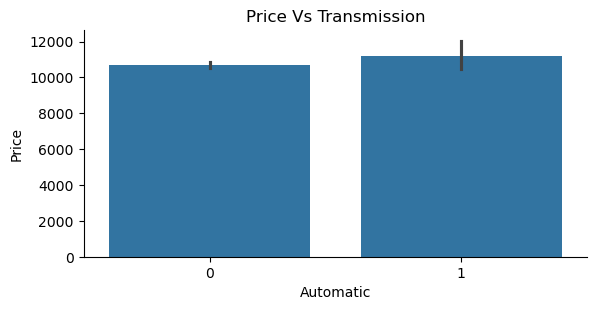

In [62]:
#RELATIONSHIP OF PRICE WRT TRANSMISSION TYPE
sns.catplot(data,
            x='Automatic',
            y='Price',
            kind='bar',
           height=3,
           aspect=2)
plt.title('Price Vs Transmission')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2824\1692607266.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.relplot(data,


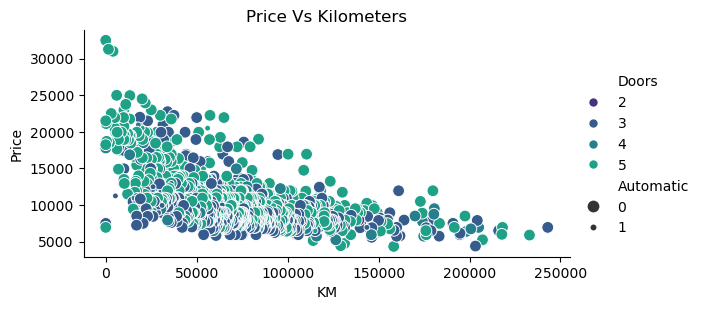

In [63]:
#RELATIONSHIP OF PRICE WITH RESPECT TO NUMBER OF KILOMETERS
pal=sns.color_palette('viridis')
sns.relplot(data,
            x='KM',
            y='Price',
            kind='scatter',
           height=3,
           aspect=2,
           hue='Doors',
           size='Automatic',
           palette=pal)
                      
plt.title('Price Vs Kilometers')
plt.show()

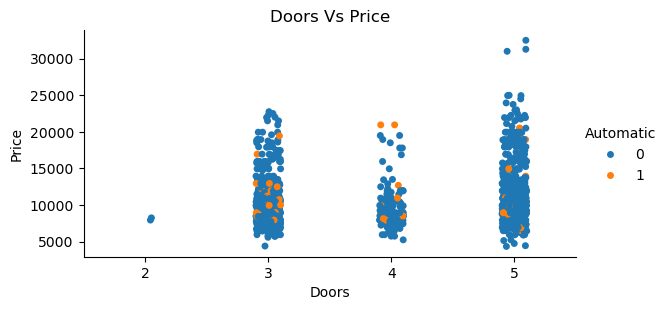

In [64]:
# RELATION OF PRICE WRT NUMBER OF DOORS
sns.catplot(
    data,
    x='Doors',
    y='Price',
    kind='strip',
    height=3,
    aspect=2,
    hue='Automatic'
)
plt.title("Doors Vs Price")
plt.show()

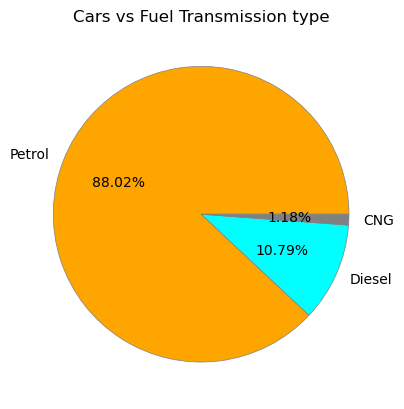

In [65]:
# PROPORTION OF CARS WITH DIFFERENT FUEL TYPE
plt.title("Cars vs Fuel Transmission type"),
plt.pie(data['FuelType'].value_counts(),labels=['Petrol','Diesel','CNG'],
       autopct='%0.2f%%',
       textprops={'fontsize':10},
       wedgeprops={'edgecolor':'grey','linewidth':0.5},
    colors=['orange','cyan','grey']
       )
plt.show()

In [66]:
data['FuelType'].value_counts()

FuelType
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

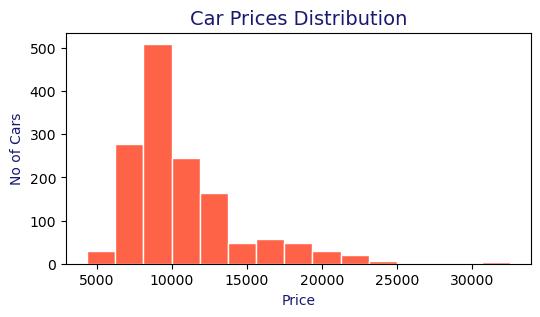

In [67]:
plt.figure(figsize=(6,3))
plt.ylabel('No of Cars', color='midnightblue')
plt.xlabel('Price', color='midnightblue')
plt.title('Car Prices Distribution', color='midnightblue', fontsize=14)
plt.hist(data['Price'], 
         bins=15,
         edgecolor='white', 
         color='tomato')
plt.show()

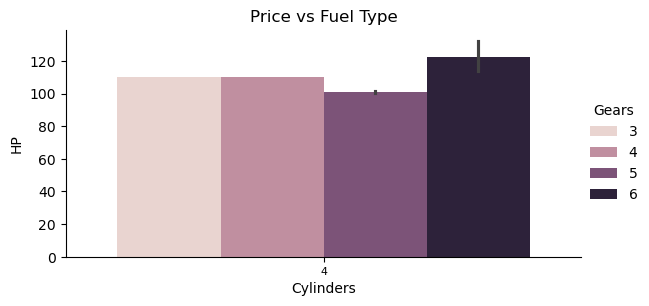

In [68]:
#RELATIONSHIP OF PRICE WRT FUEL TYPE
sns.catplot(data, x='Cylinders',
            y='HP', 
            kind = 'bar',
            height=3, 
            aspect=2,
            hue='Gears'
           )
plt.title('Price vs Fuel Type')
plt.xticks(fontsize=8)
plt.show()

In [69]:
sns.pairplot(data,hue='HP',palette='pastel',height=8,aspect=6)
plt.show()

## Split Data

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
encoded_data=le.fit_transform(data['FuelType'])
data['FuelType']=encoded_data
data.head()

Price  Age     KM  FuelType  HP  Automatic    CC  Doors  Cylinders  Gears  \
0  13500   23  46986         1  90          0  2000      3          4      5   
1  13750   23  72937         1  90          0  2000      3          4      5   
2  13950   24  41711         1  90          0  2000      3          4      5   
3  14950   26  48000         1  90          0  2000      3          4      5   
4  13750   30  38500         1  90          0  2000      3          4      5   

   Weight  
0    1165  
1    1165  
2    1165  
3    1165  
4    1170

In [71]:
X=data.iloc[:,2:]
Y=data.iloc[:,:1]

In [72]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1148, 9), (288, 9), (1148, 1), (288, 1))

### Build the model

In [73]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age        1436 non-null   int64
 2   KM         1436 non-null   int64
 3   FuelType   1436 non-null   int32
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   CC         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Cylinders  1436 non-null   int64
 9   Gears      1436 non-null   int64
 10  Weight     1436 non-null   int64
dtypes: int32(1), int64(10)
memory usage: 117.9 KB


### Hyperparameter Tuning for Lasso and Ridge

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': np.logspace(-4, 2, 50)}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, Y_train)


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-04, 1.32571137e-04, 1.75751062e-04, 2.32995181e-04,
       3.08884360e-04, 4.09491506e-04, 5.42867544e-04, 7.19685673e-04,
       9.54095476e-04, 1.26485522e-03, 1.67683294e-03, 2.22299648e-03,
       2.94705170e-03, 3.90693994e-03, 5.17947468e-03, 6.86648845e-03,
       9.10298178e-03, 1.20679264e-02, 1.5...
       2.68269580e-01, 3.55648031e-01, 4.71486636e-01, 6.25055193e-01,
       8.28642773e-01, 1.09854114e+00, 1.45634848e+00, 1.93069773e+00,
       2.55954792e+00, 3.39322177e+00, 4.49843267e+00, 5.96362332e+00,
       7.90604321e+00, 1.04811313e+01, 1.38949549e+01, 1.84206997e+01,
       2.44205309e+01, 3.23745754e+01, 4.29193426e+01, 5.68986603e+01,
       7.54312006e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [76]:
best_lasso = lasso_grid.best_estimator_
lasso_pred = best_lasso.predict(X_test_scaled)

In [77]:
lasso_mse = mean_squared_error(Y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

2851.2901083674847

In [78]:
ridge = Ridge(max_iter=10000)
ridge_params = {'alpha': np.logspace(-4, 2, 50)}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=Ridge(max_iter=10000),
             param_grid={'alpha': array([1.00000000e-04, 1.32571137e-04, 1.75751062e-04, 2.32995181e-04,
       3.08884360e-04, 4.09491506e-04, 5.42867544e-04, 7.19685673e-04,
       9.54095476e-04, 1.26485522e-03, 1.67683294e-03, 2.22299648e-03,
       2.94705170e-03, 3.90693994e-03, 5.17947468e-03, 6.86648845e-03,
       9.10298178e-03, 1.20679264e-02, 1.5...
       2.68269580e-01, 3.55648031e-01, 4.71486636e-01, 6.25055193e-01,
       8.28642773e-01, 1.09854114e+00, 1.45634848e+00, 1.93069773e+00,
       2.55954792e+00, 3.39322177e+00, 4.49843267e+00, 5.96362332e+00,
       7.90604321e+00, 1.04811313e+01, 1.38949549e+01, 1.84206997e+01,
       2.44205309e+01, 3.23745754e+01, 4.29193426e+01, 5.68986603e+01,
       7.54312006e+01, 1.00000000e+02])},
             scoring='neg_mean_squared_error')

In [79]:
best_ridge = ridge_grid.best_estimator_
ridge_pred = best_ridge.predict(X_test_scaled)

In [80]:
ridge_mse = mean_squared_error(Y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

3068.624204155329

### Observations
The lower RMSE in Lasso (≈2851) indicates better generalization on the test data compared to Ridge whereas the higher RMSE (≈3069) implies it may be overfitting to less important features, hurting its generalization performance slightly.
This suggests that not all features contribute equally, and Lasso is successfully identifying and ignoring less relevant or redundant variables.






### Interview Questions

1.What is Normalization & Standardization and how is it helpful?
Normalization and standardization are techniques used to scale numerical data. Normalization rescales features to a fixed range, typically [0, 1], which is useful when features have different units or ranges. Standardization, on the other hand, transforms data to have a mean of 0 and standard deviation of 1. These techniques are crucial in regression and machine learning as they ensure all features contribute equally, improve algorithm performance, and help models converge faster during training.

2. What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity occurs when predictor variables in a regression model are highly correlated, leading to unreliable and unstable estimates. 
To address this, one can remove or combine correlated features, use dimensionality reduction techniques like Principal Component Analysis (PCA), or apply regularization methods such as Ridge or Lasso regression. These approaches help improve model stability, interpretability, and generalization by reducing the redundancy among input variables.

